# NAMA: Muhammad Iqbal 
# NIM: 0901137122115 

# Implementasi Artificial Neural Network Medical Appointment No Shows.



Why do 30% of patients miss their scheduled appointments?
110.527 medical appointments its 14 associated variables (characteristics). The most important one if the patient show-up or no-show to the appointment. A person makes a doctor appointment, receives all the instructions and no-show. Who to blame?

# 1. Import Library
The first step we do is import the library that we will use.
### Library Numpy 
function to process data in the form of numbers (arrays)
### Library Matplotlib 
function to help visualize the dataset making it easier to understand
### Library Sklearn 
used at the Preprocessing stage to convert data into a format that is more effectively processed in neural networks
### Library Pandas
Function to read database files in the form of .CSV
### Library Seaborn
same as Matplotlib, which functions to help visualize the dataset

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.activations import relu
import pandas as pd
import seaborn as sns

Using TensorFlow backend.


# 2. Import Dataset
This dataset has 10 columns and 110528 rows with 9 columns as features and 1 column (shpw) as labels that have values 0 (Present) and 1 (Not Present)

In [2]:
dataset=pd.read_csv("datapasien3.csv", delimiter=";" )
dataset.head()

,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,show
0,5642903,0,62,0,1,0,0,0,0,0
1,5642503,1,56,0,0,0,0,0,0,0
2,5642549,0,62,0,0,0,0,0,0,0
3,5642828,0,8,0,0,0,0,0,0,0
4,5642494,0,56,0,1,1,0,0,0,0


# 3. Check if there is empty data
After we import the dataset, we should first make sensitivity to our dataset, whether the remaining data is clean or there is still empty data.

In [3]:
dataset.isnull().any().sum()

0

# 4. Data Visualization
To find out how much data is spread over the values of 0 and 1, we need visualization to make it easier to understand. With the help of the matplotlib and seaborn libraries

In [32]:
dataset.show.value_counts()

0    88208
1    22319
Name: show, dtype: int64

- The above command functions to see the amount of data labeled 0 (Not present) as many as 22319 while the data labeled 1 (Present) is 88208.
- While in the command below it functions to display the amount of data generated in the above command in the form of a Bar using the Seaborn library

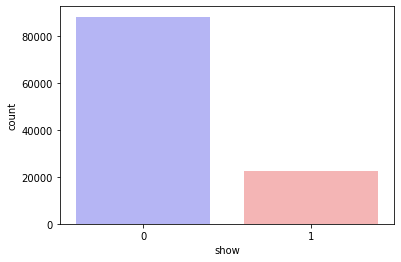

In [5]:
sns.countplot(x="show", data=dataset, palette="bwr")
plt.show()

In [6]:
belumkenapenyakit = len(dataset[dataset.show == 0])
kenapenyakit = len(dataset[dataset.show == 1])
print("Persentase pasien yang datang : {:.2f}%".format((belumkenapenyakit / (len(dataset.show))*100)))
print("Persentase pasien yang tidak datang : {:.2f}%".format((kenapenyakit / (len(dataset.show))*100)))

Persentase pasien yang datang : 79.81%
Persentase pasien yang tidak datang : 20.19%


- visible amount of patient data where 79.81% of patients were Present and 20.19% of patients were Not Present.

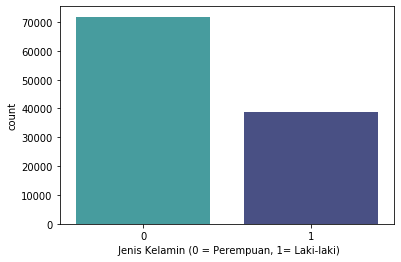

In [7]:
sns.countplot(x='Gender', data=dataset, palette="mako_r")
plt.xlabel(" Jenis Kelamin (0 = Perempuan, 1= Laki-laki)")
plt.show()

In [8]:
Perempuan = len(dataset[dataset.Gender == 0])
Laki_Laki = len(dataset[dataset.Gender == 1])
print("Persentase jumlah pasien Perempuan : {:.2f}%".format((Perempuan / (len(dataset.Gender))*100)))
print("Persentase jumlah pasien Laki-laki : {:.2f}%".format((Laki_Laki / (len(dataset.Gender))*100)))

Persentase jumlah pasien Perempuan : 65.00%
Persentase jumlah pasien Laki-laki : 35.00%


- While in the bar graph below also shows the amount of data by sex, where in this dataset there is more female gender data than male gender data.

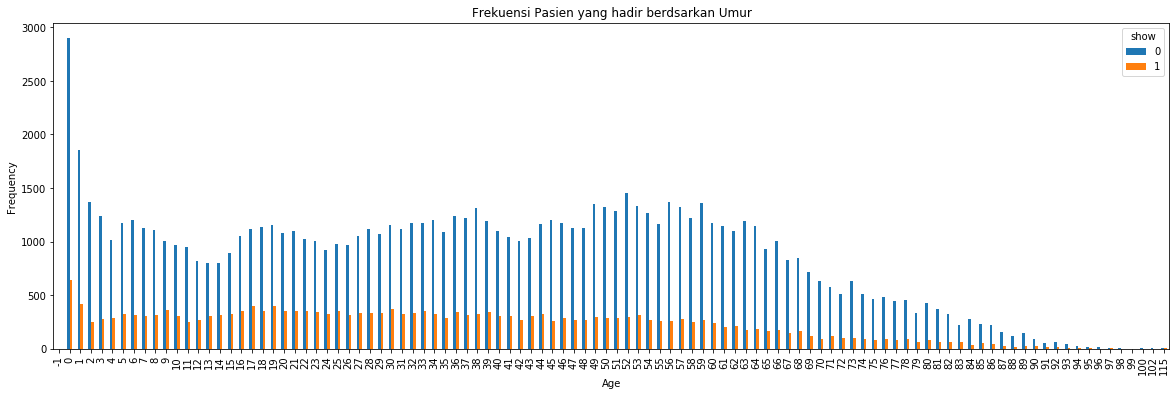

In [9]:
pd.crosstab(dataset.Age,dataset.show).plot(kind="bar",figsize=(20,6))
plt.title('Frekuensi Pasien yang hadir berdasarkan Umur')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('show and age.png')
plt.show()

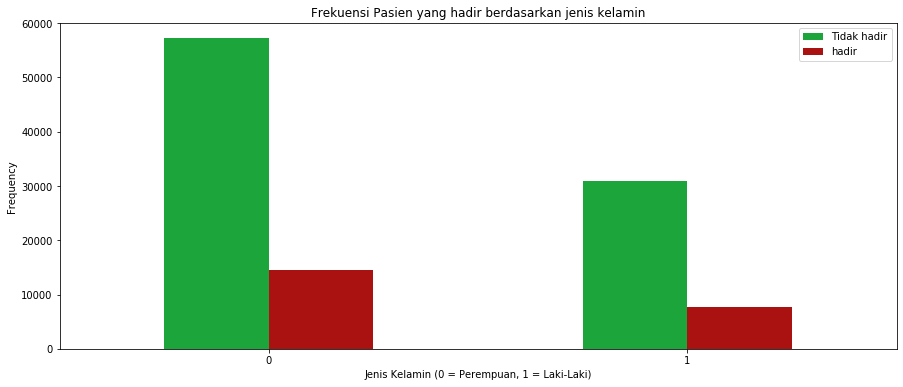

In [10]:
pd.crosstab(dataset.Gender,dataset.show).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Frekuensi Pasien yang hadir berdasarkan jenis kelamin')
plt.xlabel('Jenis Kelamin (0 = Perempuan, 1 = Laki-Laki)')
plt.xticks(rotation=0)
plt.legend(["Tidak hadir", "hadir"])
plt.ylabel('Frequency')
plt.show()

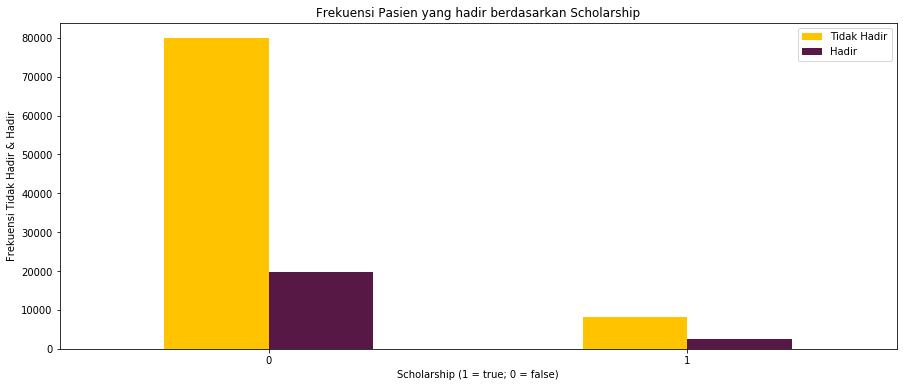

In [11]:
pd.crosstab(dataset.Scholarship,dataset.show).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Frekuensi Pasien yang hadir berdasarkan Scholarship')
plt.xlabel('Scholarship (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Tidak Hadir", "Hadir"])
plt.ylabel('Frekuensi Tidak Hadir & Hadir')
plt.show()

# 5. Determine Features dan Labels
features starts from column 1- 8 while for the Labels itself we take the last column, column 9.

In [12]:
features = dataset.iloc[:, 0:8].values
labels = dataset.iloc[:, 9].values

# 6. Normalization
at this stage we use the Normalization method which is MinMaxScaler

In [13]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

# 7. Splitting dan Modelling
At this stage we make a test file measuring 20% of the total amount of data available. After that we create an NN model with 50 first layer hiden and 50 second layer hiden. Besides that we make layer 1 output (yes or no)

In [14]:
training_data, testing_data, training_label, testing_label = train_test_split(features, labels , test_size=0.2, shuffle=True, stratify=labels)

In [15]:
model = Sequential()
model.add(Dense(units= 50, input_dim = training_data.shape[1], activation=relu))
model.add(Dense(units= 50, activation=relu))
model.add(Dropout(0.5))
model.add(Dense(units= 1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.save('model.h5')

In [16]:
acc_training = model.fit(training_data, training_label, validation_data=(testing_data, testing_label), batch_size=50, epochs=300)
acc_testing  = model.evaluate(testing_data, testing_label) 

Train on 88421 samples, validate on 22106 samples
Epoch 1/300
88421/88421 [==============================] - 18s 202us/step - loss: 0.5043 - accuracy: 0.7962 - val_loss: 0.4913 - val_accuracy: 0.7981
Epoch 2/300
88421/88421 [==============================] - 12s 131us/step - loss: 0.4939 - accuracy: 0.7981 - val_loss: 0.4875 - val_accuracy: 0.7981
Epoch 3/300
88421/88421 [==============================] - 8s 95us/step - loss: 0.4897 - accuracy: 0.7981 - val_loss: 0.4860 - val_accuracy: 0.7981
Epoch 4/300
88421/88421 [==============================] - 14s 162us/step - loss: 0.4885 - accuracy: 0.7981 - val_loss: 0.4864 - val_accuracy: 0.7981
Epoch 5/300
88421/88421 [==============================] - 13s 147us/step - loss: 0.4873 - accuracy: 0.7981 - val_loss: 0.4866 - val_accuracy: 0.7981
Epoch 6/300
88421/88421 [==============================] - 13s 144us/step - loss: 0.4870 - accuracy: 0.7981 - val_loss: 0.4874 - val_accuracy: 0.7981
Epoch 7/300
88421/88421 [===========================

C:\Users\hp\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.127033). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


88421/88421 [==============================] - 11s 120us/step - loss: 0.4856 - accuracy: 0.7976 - val_loss: 0.4845 - val_accuracy: 0.7980
Epoch 13/300
88421/88421 [==============================] - 12s 135us/step - loss: 0.4847 - accuracy: 0.7980 - val_loss: 0.4852 - val_accuracy: 0.7980
Epoch 14/300
88421/88421 [==============================] - 11s 123us/step - loss: 0.4849 - accuracy: 0.7975 - val_loss: 0.4843 - val_accuracy: 0.7981
Epoch 15/300
88421/88421 [==============================] - 11s 122us/step - loss: 0.4845 - accuracy: 0.7978 - val_loss: 0.4851 - val_accuracy: 0.7980
Epoch 16/300
88421/88421 [==============================] - 12s 141us/step - loss: 0.4847 - accuracy: 0.7976 - val_loss: 0.4848 - val_accuracy: 0.7981
Epoch 17/300
88421/88421 [==============================] - 11s 130us/step - loss: 0.4844 - accuracy: 0.7978 - val_loss: 0.4850 - val_accuracy: 0.7982
Epoch 18/300
88421/88421 [==============================] - 10s 114us/step - loss: 0.4841 - accuracy: 0.797

C:\Users\hp\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.108027). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


88421/88421 [==============================] - 15s 165us/step - loss: 0.4818 - accuracy: 0.7978 - val_loss: 0.4836 - val_accuracy: 0.7981
Epoch 276/300
88421/88421 [==============================] - 12s 132us/step - loss: 0.4818 - accuracy: 0.7977 - val_loss: 0.4836 - val_accuracy: 0.7983
Epoch 277/300
88421/88421 [==============================] - 13s 147us/step - loss: 0.4814 - accuracy: 0.7981 - val_loss: 0.4836 - val_accuracy: 0.7984
Epoch 278/300
88421/88421 [==============================] - 12s 134us/step - loss: 0.4816 - accuracy: 0.7975 - val_loss: 0.4836 - val_accuracy: 0.7982
Epoch 279/300
88421/88421 [==============================] - 12s 134us/step - loss: 0.4816 - accuracy: 0.7979 - val_loss: 0.4838 - val_accuracy: 0.7982
Epoch 280/300
88421/88421 [==============================] - 12s 133us/step - loss: 0.4816 - accuracy: 0.7978 - val_loss: 0.4835 - val_accuracy: 0.7982
Epoch 281/300
88421/88421 [==============================] - 11s 130us/step - loss: 0.4815 - accuracy:

In [33]:
print('The accuracy is {}'.format(acc_testing[1]))

The accuracy is 0.7983353137969971


In [18]:
acc_training.history

{'val_loss': [0.491298837145885,
  0.4874569433022115,
  0.4860052036627551,
  0.48640130692279837,
  0.48663492530576247,
  0.4874220037664168,
  0.4894833371837269,
  0.4883948722479301,
  0.4848034665302638,
  0.4871396363606596,
  0.48534870529233043,
  0.48450061779728437,
  0.48519968517083534,
  0.48429013214251104,
  0.48513899872845073,
  0.4847888858202064,
  0.4850068607233686,
  0.4840225369064428,
  0.48487458418184176,
  0.48448601122421453,
  0.48620339819859304,
  0.48624934547143556,
  0.4850905302379138,
  0.4848137732777543,
  0.48469569830455295,
  0.485066574037555,
  0.4844911867791599,
  0.48468969664314393,
  0.48566122583207055,
  0.484096607312157,
  0.4843121096417665,
  0.48509624583693334,
  0.4846421604883204,
  0.485051556560213,
  0.48437599998345304,
  0.48480117524316235,
  0.4841453936815499,
  0.48506220349853074,
  0.4840152459663147,
  0.48373694647375537,
  0.4849028101735748,
  0.4843736842893469,
  0.48448898868464585,
  0.48458377643105216,
  0

# 8. Plotting Model Accuracy and Loss Accuracy


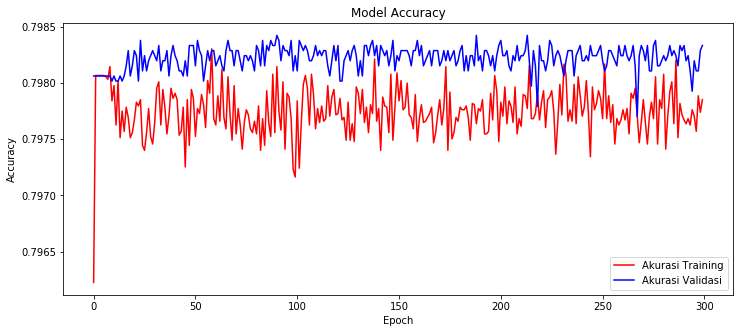

In [20]:
fig,(ax0) = plt.subplots(nrows=1, figsize=(12,5))
ax0.plot(acc_training.history['accuracy'],'red', label='Akurasi Training')
ax0.plot(acc_training.history['val_accuracy'], 'blue', label='Akurasi Validasi')
ax0.plot(label='Accuracy', loc='upper left')
ax0.set_title('Model Accuracy')
ax0.set_xlabel("Epoch")
ax0.set_ylabel("Accuracy")
ax0.legend()
plt.savefig('Grafik Akurasi.png')

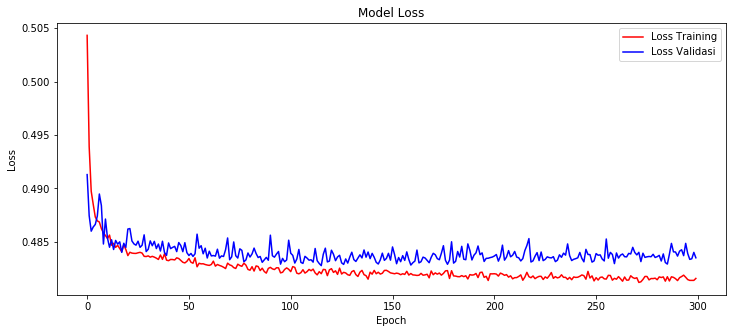

In [21]:
fig,(ax1) = plt.subplots(nrows=1, figsize=(12,5))
ax1.plot(acc_training.history['loss'],'red', label='Loss Training')
ax1.plot(acc_training.history['val_loss'], 'blue', label='Loss Validasi')
ax1.plot(label='Loss', loc='upper left')
ax1.set_title('Model Loss')
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()
plt.savefig('Grafik Loss.png')

In [22]:
training_predicted = model.predict(training_data)
testing_predicted = model.predict(testing_data)

In [23]:
training_predicted.round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

# 9. Confusion Matrix
Confusion matrix is a method that is usually used to calculate accuracy in the concept of data mining. This formula performs calculations with 4 outputs, namely: recall, precision, accuracy and error rate.

Confusion Matrix has 4 instances namely

     -True Positive
     -False positive
     -False negative
     -True Negativ
    
    
1. True Positives (TP): True positive is the case when the actual class of data points is 1 (True) and the prediction is also 1 (True)

2. True Negative (TN): True Negative is a case when the actual class of data points is 0 (False) and the prediction is also 0 (False

3. False Positive (FP): False positive is the case when the actual class of data points is 0 (False) and the predicted one is (True).

4. False Negatives (FN): False Negatives are cases when the actual class of data points is 1 (True) and the prediction is 0 (False).

In [24]:
from sklearn.metrics import confusion_matrix

training_cm = confusion_matrix(training_label,training_predicted.round())
testing_cm = confusion_matrix(testing_label,testing_predicted.round())

In [25]:
training_cm

array([[70545,    21],
       [17794,    61]], dtype=int64)

In [26]:
tp = training_cm[0][0]
fn = training_cm[0][1]
fp = training_cm[1][0]
tn = training_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy training {0}".format(accuracy))
print("Specificity training {0}".format(specificity))
print("Sensitivity training {0}".format(sensitivity))
print("Precision training {0}".format(precision))
print("F1 Score training {0}".format(f1_score))

Accuracy training 0.7985207134051866
Specificity training 0.0034164099691963035
Sensitivity training 0.9997024062579712
Precision training 0.7985714123999592
F1 Score training 0.8878889902772097


In [27]:
testing_cm

array([[17634,     8],
       [ 4450,    14]], dtype=int64)

In [29]:
tp = testing_cm[0][0]
fn = testing_cm[0][1]
fp = testing_cm[1][0]
tn = testing_cm[1][1]

accuracy = (tp+tn)/(tp+tn+fp+fn)
specificity = tn/(tn+fp)
sensitivity = tp/(tp+fn)
precision = tp/(tp+fp)
f1_score = (2*sensitivity*precision)/(sensitivity+precision)

print("Accuracy testing {0}".format(accuracy))
print("Specificity testing {0}".format(specificity))
print("Sensitivity testing {0}".format(sensitivity))
print("Precision testing {0}".format(precision))
print("F1 Score testing {0}".format(f1_score))

Accuracy testing 0.798335293585452
Specificity testing 0.0031362007168458782
Sensitivity testing 0.9995465366738465
Precision testing 0.7984966491577613
F1 Score testing 0.8877813019181393


# Referensi 
- Dataset : https://www.kaggle.com/joniarroba/noshowappointments  